In [ ]:
#Data Cleaning and Processing


#Required Libraries
#pandas numpy matplotlib seaborn scipy

In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import zscore
from google.colab import files

# Load the dataset
df = pd.read_csv('/content/Nutrition__Physical_Activity__and_Obesity_-_Behavioral_Risk_Factor_Surveillance_System.csv')


# data cleaning
# Focusing on Obseity/ Weight Status, and Education over 12 year spam only in the states with group of ages
# limiting data - too much data
# removing duplicates
# removing outliers
# Idenifying missing values
# remove that value
# Renaming columns
# Removing white space, converting to lowercase for string type columns





#filter rows to only obtain obesity or not
new_df = df[df['Topic'].str.contains('Weight|Obesity', case=False, na=False)]

#removing empty rows and Null values
new_df = new_df[new_df['Education'].notna() & (new_df['Education'].str.strip() != "")]

#filter the columns: to use age, location, year, and obesity, education
new_df = new_df[['YearEnd', 'LocationDesc', 'Data_Value','Education']]

#remove any duplicates in the data
new_df = new_df.drop_duplicates()

#rename columns
new_df = new_df.rename(columns={
   'YearEnd': 'Year',
   'LocationDesc': 'State',
   'Education': 'Education_Level',
   'Data_Value': 'Obesity_Rate',
   'Age': 'Age_Group'
})


#removing outliers
n = new_df['Obesity_Rate'].quantile(0.25)
n2 = new_df['Obesity_Rate'].quantile(0.75)
IQR = n2 - n
lower = n - 1.5 * IQR
upper = n2 + 1.5 * IQR
new_df = new_df[(new_df['Obesity_Rate'] >= lower) & (new_df['Obesity_Rate'] <= upper)]

#remove white space and lowercase
for col in new_df.select_dtypes(include=['object']).columns:
   new_df[col] = new_df[col].str.strip().str.lower()


cleaned_file_path = "cleaned_data.csv"
new_df.to_csv(cleaned_file_path, index=False)

print(f"Cleaned data saved to: {cleaned_file_path}")


Cleaned data saved to: cleaned_data.csv


In [ ]:
#EDA

#First we explored the new dataset structure along with viewing the first few rows
print(new_df.info())

#viewing first rows of data
print(new_df.head())


<class 'pandas.core.frame.DataFrame'>
Index: 5344 entries, 14 to 104257
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Year             5344 non-null   int64  
 1   State            5344 non-null   object 
 2   Obesity_Rate     5344 non-null   float64
 3   Education_Level  5344 non-null   object 
dtypes: float64(1), int64(1), object(2)
memory usage: 208.8+ KB
None
     Year   State  Obesity_Rate                   Education_Level
14   2011  alaska          25.8  some college or technical school
91   2011  alaska          28.8             less than high school
95   2011  alaska          33.1              high school graduate
96   2011  alaska          38.0              high school graduate
120  2011  alaska          35.3             less than high school


In [ ]:
#finding any missing values or nulls
print(new_df.isnull().sum())
#proceed to drop any null values found
new_df.dropna(inplace=True)

Year               0
State              0
Obesity_Rate       0
Education_Level    0
dtype: int64


In [ ]:
#look at the overall statistical view to make sure that there is no skewness or outliers
print(new_df.describe())

              Year  Obesity_Rate
count  5344.000000    5344.00000
mean   2017.094499      33.54274
std       3.715537       4.15828
min    2011.000000      22.00000
25%    2014.000000      31.20000
50%    2017.000000      34.20000
75%    2020.000000      36.40000
max    2023.000000      44.70000


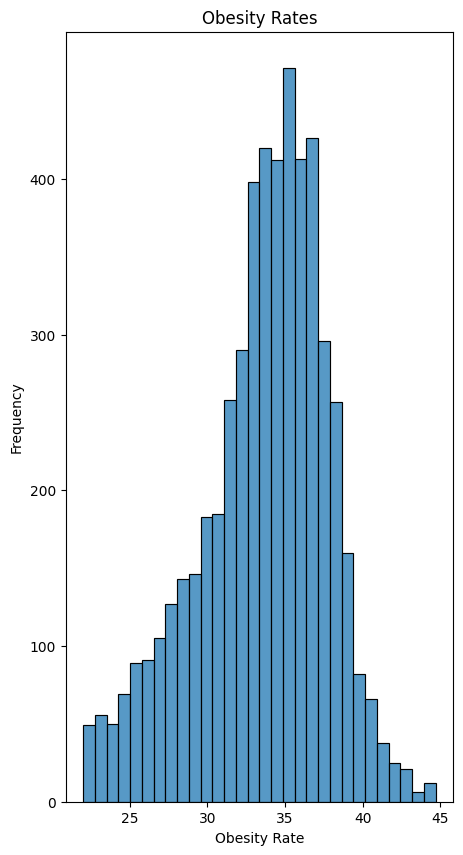

In [ ]:
#using seaborn for histogram
import seaborn as sns
import matplotlib.pyplot as plt

#using mat library to view the figure
#we are examining obesity rate distribution over frequency
plt.figure(figsize=(5, 10))
sns.histplot(new_df['Obesity_Rate'], bins=30)
plt.title("Obesity Rates")
plt.xlabel("Obesity Rate")
plt.ylabel("Frequency")
plt.show()


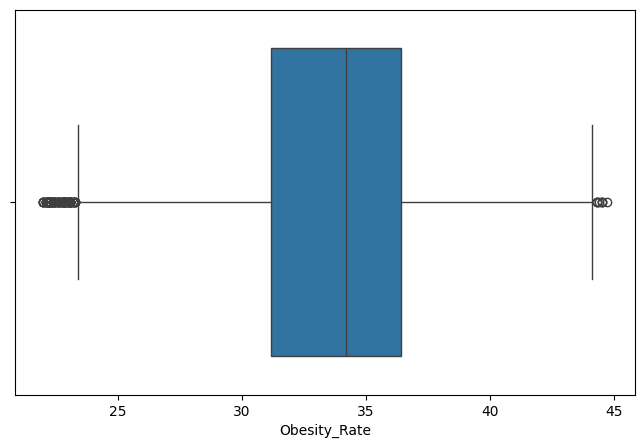

In [ ]:
#Using box plot to see if there are any significant outliers
plt.figure(figsize=(8, 5))
sns.boxplot(x=new_df['Obesity_Rate'])
plt.show()

<ipython-input-17-59c71ec6a26e>:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_df = filtered_df.groupby(["Year", "Education_Level"])["Obesity_Rate"].mean().reset_index()


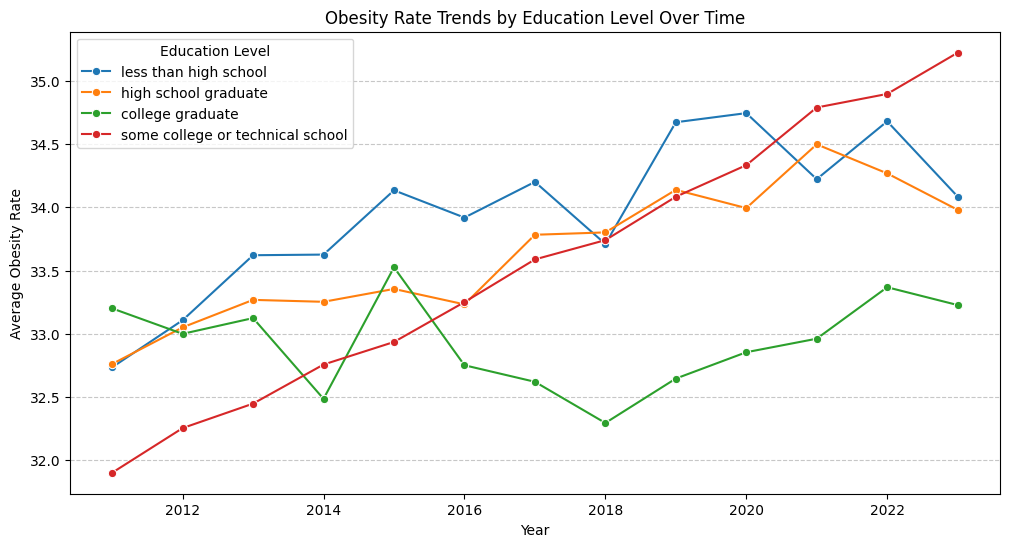

In [ ]:

#linear plot to understand the trends of obesity rates over time by educational levels
education_levels = ["less than high school", "high school graduate", "college graduate", "some college or technical school"]

new_df["Education_Level"] = pd.Categorical(new_df["Education_Level"], categories=education_levels, ordered=True)
get_education_df = new_df[new_df["Education_Level"].isin(education_levels)]
grouped_df = get_education_df .groupby(["Year", "Education_Level"])["Obesity_Rate"].mean().reset_index()

#our plot
plt.figure(figsize=(12,6))
sns.lineplot(data=grouped_df, x="Year", y="Obesity_Rate", hue="Education_Level", marker="o")

plt.xlabel("Year")
plt.ylabel(" Avg. Obesity Rate")
plt.title("Obesity Rate vs Education Level")
plt.legend(title="Education Level")
plt.grid(axis='y', linestyle="--", alpha=0.7)

plt.show()

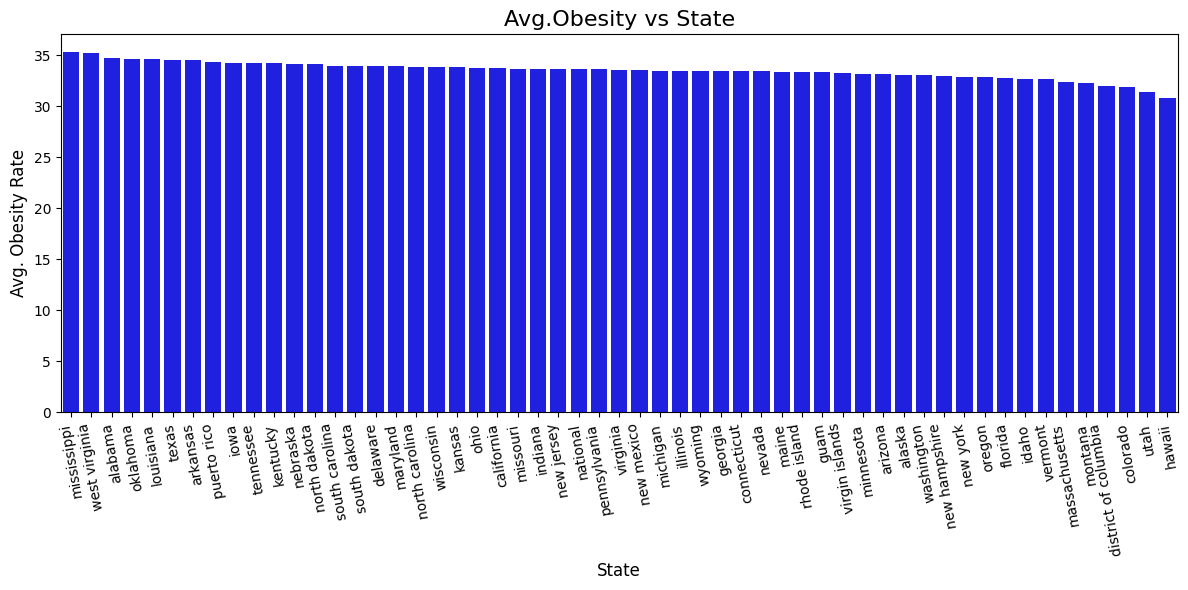

In [ ]:
state_mean = new_df.groupby('State')['Obesity_Rate'].mean().reset_index()
state_mean = state_mean.sort_values('Obesity_Rate', ascending=False)

#we are plotting obesity rate vs state to find any trends within these two attributes
plt.figure(figsize=(12, 6))
sns.barplot(data=state_mean, x='State', y='Obesity_Rate', color='blue')

plt.title("Avg.Obesity vs State", fontsize=16)
plt.xlabel("State", fontsize=12)
plt.ylabel("Avg. Obesity Rate", fontsize=12)
plt.xticks(rotation=100)

plt.tight_layout()
plt.show()

**Linear Regression Model**
- Using this model to predict the obesity rate using education level and physical activity as the independent features.

Linear Regression RMSE: 4.112920111889637
R-squared: -0.007950238410973087


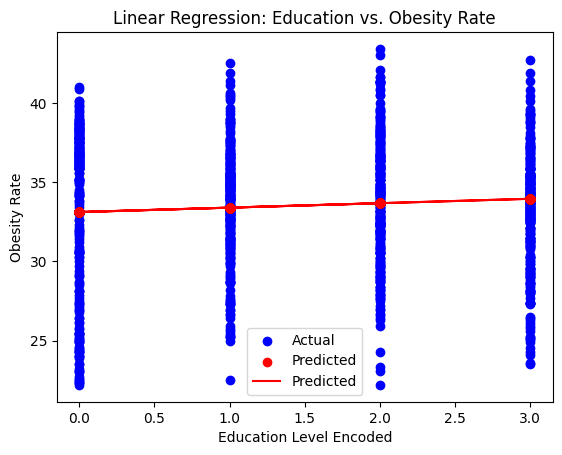

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, mean_squared_error
from sklearn.metrics import r2_score
df = pd.read_csv("/content/cleaned_data (6).csv")

#encode categorical education levels
encoder = LabelEncoder()
df["Education_Level_Encoded"] = encoder.fit_transform(df["Education_Level"])

#standardize numerical features
scaler = StandardScaler()
df["Obesity_Rate_Scaled"] = scaler.fit_transform(df[["Obesity_Rate"]])

#linear Regression model training
X_reg = df[["Education_Level_Encoded"]]
y_reg = df["Obesity_Rate"]
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

lin_reg = LinearRegression()
lin_reg.fit(X_train_reg, y_train_reg)
y_pred_reg = lin_reg.predict(X_test_reg)

#calculate RMSE for Linear Regression
rmse = np.sqrt(mean_squared_error(y_test_reg, y_pred_reg))
r2 = r2_score(y_test_reg, y_pred_reg)
print("Linear Regression RMSE:", rmse)
print("R-squared:", r2)

#plot of results
plt.scatter(X_test_reg, y_test_reg, color='blue', label='Actual')
plt.scatter(X_test_reg, y_pred_reg, color='red', label='Predicted')
#line of best fit
plt.plot(X_test_reg, y_pred_reg, color='red', label='Predicted')
plt.xlabel("Education Level Encoded")
plt.ylabel("Obesity Rate")
plt.title("Linear Regression: Education vs. Obesity Rate")
plt.legend()
plt.show()

**k-Means Clustering Model**
- Using this model to cluster states based on obesity trends.

Cluster Centers: [[-1.63890907]
 [ 0.90842686]
 [-0.16441267]]


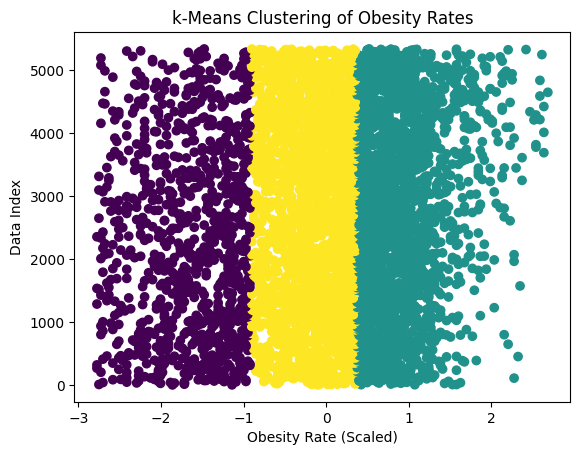

In [ ]:
#k-Means Clustering Model
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df["Cluster"] = kmeans.fit_predict(df[["Obesity_Rate_Scaled"]])
print("Cluster Centers:", kmeans.cluster_centers_)

#out plot of the Results
plt.scatter(df["Obesity_Rate_Scaled"], df.index, c=df["Cluster"], cmap='viridis')
plt.xlabel("Obesity Rate (Scaled)")
plt.ylabel("Data Index")
plt.title("k-Means Clustering of Obesity Rates")
plt.show()

**Logistic Regression Model**
- Using this model to classify individuals into high-risk (1) and low-risk (0) obesity categories.

Logistic Regression Accuracy: 0.5322731524789522
Confusion Matrix:
 [[298 248]
 [252 271]]
Classification Report:
               precision    recall  f1-score   support

           0       0.54      0.55      0.54       546
           1       0.52      0.52      0.52       523

    accuracy                           0.53      1069
   macro avg       0.53      0.53      0.53      1069
weighted avg       0.53      0.53      0.53      1069



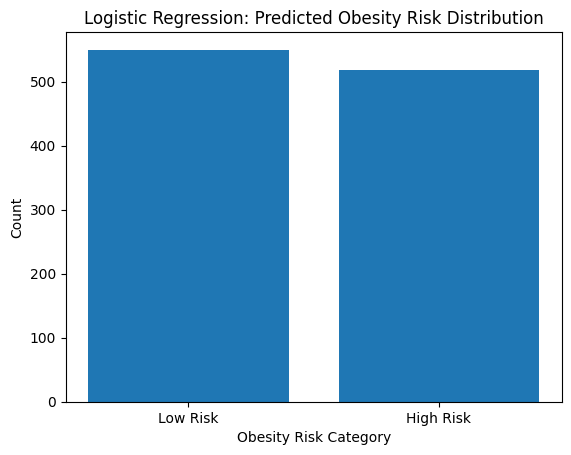

In [ ]:
#logistic Regression Model
X_clf = df[["Education_Level_Encoded"]]
y_clf = (df["Obesity_Rate"] > df["Obesity_Rate"].median()).astype(int)
X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(X_clf, y_clf, test_size=0.2, random_state=42)

log_reg = LogisticRegression()
log_reg.fit(X_train_clf, y_train_clf)
y_pred_clf = log_reg.predict(X_test_clf)

#calculating accuracy for the results of the training
accuracy = accuracy_score(y_test_clf, y_pred_clf)
print("Logistic Regression Accuracy:", accuracy)
print("Confusion Matrix:\n", confusion_matrix(y_test_clf, y_pred_clf))
print("Classification Report:\n", classification_report(y_test_clf, y_pred_clf))

#out plot of the Results
plt.bar(["Low Risk", "High Risk"], np.bincount(y_pred_clf))
plt.xlabel("Obesity Risk Category")
plt.ylabel("Count")
plt.title("Logistic Regression: Predicted Obesity Risk Distribution")
plt.show()

Accuracy: 0.5977549111318989


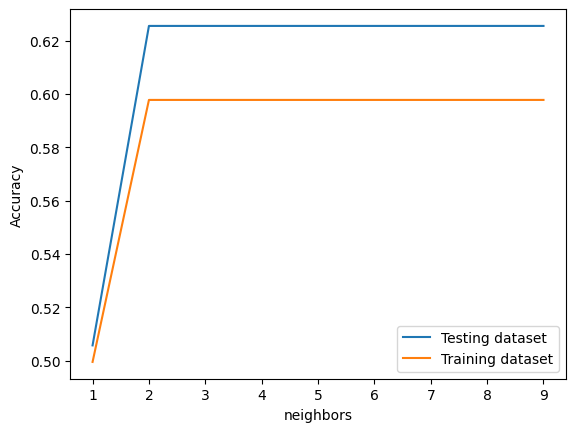

In [ ]:
#k-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
#placing obesity rates into categories for nearest neighbor

#low, med , high
df["Obesity_Category"] = pd.cut(df["Obesity_Rate"], bins=3, labels=[0, 1, 2])
#print(df['Education_Level_Encoded'])

x_knn = df[["Education_Level_Encoded"]]
y_knn = df["Obesity_Category"]

#traning and test data, test size -> 20 percent
x_knn_train, x_knn_test, y_knn_train, y_knn_test = train_test_split(x_knn, y_knn, test_size=0.2, random_state=42)

#classify neighbors = 5
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_knn_train, y_knn_train)

#knn prediction func call on x_knn test on model
y_knn_pred = knn.predict(x_knn_test)

print("Accuracy:", accuracy_score(y_knn_test, y_knn_pred))

#arranging neighbors from 1 to 10
neighbors = np.arange(1, 10)
#training accuracy
train_knn_acc = np.empty(len(neighbors))
#testing accuracy
test_knn_acc = np.empty(len(neighbors))

#for loop to go through training data, testing data for each neighbor
for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_knn_train, y_knn_train)
    train_knn_acc[i] = knn.score(x_knn_train, y_knn_train)
    test_knn_acc[i] = knn.score(x_knn_test, y_knn_test)

#plotting the training and test data for visual
plt.plot(neighbors, train_knn_acc, label = 'Testing dataset')
plt.plot(neighbors, test_knn_acc, label = 'Training dataset')

plt.legend()
plt.xlabel('neighbors')
plt.ylabel('Accuracy')
plt.show()


Accuracy: 0.6379794200187091


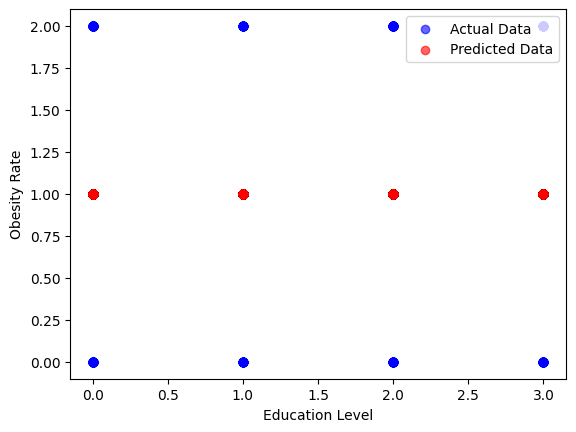

In [ ]:
#SVM - classifiction
from sklearn.svm import SVC

X_svm = df[["Education_Level_Encoded"]]
y_svm = df["Obesity_Category"].values

#training the
X_svm_train, X_svm_test, y_svm_train, y_svm_test = train_test_split(X_svm ,y_svm, test_size=0.2, random_state=42)

#svm function, kernel linear, since we want to examine a specific relationship
svm = SVC(kernel='linear')
svm.fit(X_svm_train, y_svm_train)

#prediction
y_svm_pred = svm.predict(X_svm_test)

#accuracy score
accuracy = accuracy_score(y_svm_test, y_svm_pred)
print(f"Accuracy: {accuracy}")

plt.scatter(X_svm_test, y_svm_test, color='blue', label='Actual Data', alpha=0.6)
plt.scatter(X_svm_test, y_svm_pred, color='red', label='Predicted Data', alpha=0.6)

plt.xlabel("Education Level")
plt.ylabel("Obesity Rate")
plt.legend()
plt.show()


Mean Absolute Error: 3.304921983260649


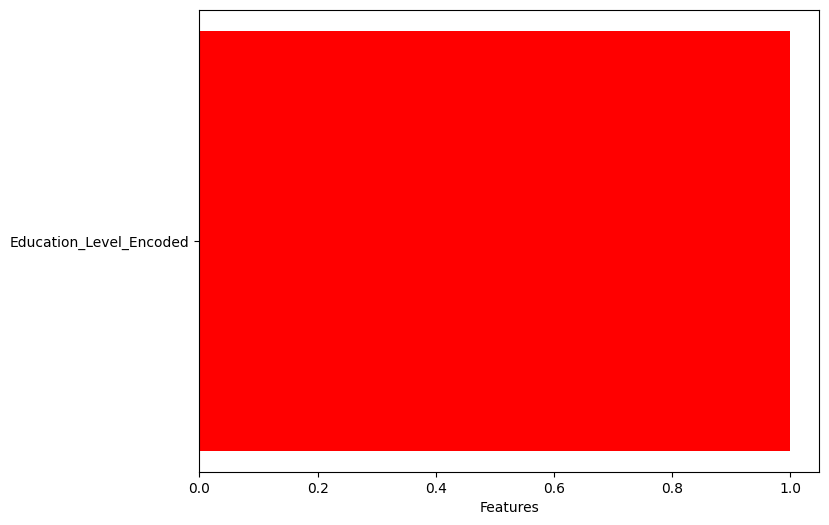

In [ ]:
#random forest
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

X = df[["Education_Level_Encoded"]].values
y = df["Obesity_Rate"].values

#spliting of data to test and train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#random forest
rf = RandomForestRegressor(n_estimators=100, random_state=42)

rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

#accuracy score
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")

#features important analysis
importances = rf.feature_importances_
feature_names = ["Education_Level_Encoded"]

# Plot feature importances
plt.figure(figsize=(8, 6))
plt.barh(feature_names, importances, color='red')
plt.xlabel("Features")
plt.show()
